# <span style="display: block; text-align: center; color: gold;">Import Libraries</span>


In [1]:
import optuna
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier



# <span style="display: block; text-align: center; color: gold;">Preliminary Dataset Loading</span>


In [31]:
df = pd.read_csv('/kaggle/input/ecg-arrhythmia-classification-dataset/MIT-BIH Arrhythmia Database.csv')

In [32]:
df.head()

,record,type,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
0,101,N,76,313.0,0.074347,-0.160548,1.036401,-0.285662,-0.026824,41,...,0.025930,2,18,22,2,0.025930,0.025930,0.025930,0.025436,0.025436
1,101,N,313,315.0,-0.052079,-0.264784,0.886597,-0.366298,-0.059710,21,...,-0.042009,26,27,62,9,-0.042009,-0.029498,0.005012,0.030892,0.002986
2,101,N,315,321.0,-0.062151,-0.296983,0.991859,-0.410306,-0.065686,22,...,0.009528,3,8,12,1,0.009528,0.009528,0.008786,0.008786,0.008368
3,101,N,321,336.0,-0.063322,-0.281386,1.034903,-0.403880,-0.071750,22,...,-0.020536,6,9,16,1,-0.020536,-0.020257,-0.018965,-0.016968,-0.014555
4,101,N,336,344.0,-0.062915,1.046914,1.046408,1.046408,-0.074639,11,...,0.016053,16,5,31,10,0.016053,0.006742,0.002782,-0.007798,-0.051155


# <span style="display: block; text-align: center; color: gold;">Exploratory Data Analysis</span>


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100689 entries, 0 to 100688
Data columns (total 34 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   record          100689 non-null  int64  
 1   type            100689 non-null  object 
 2   0_pre-RR        100689 non-null  int64  
 3   0_post-RR       100689 non-null  float64
 4   0_pPeak         100689 non-null  float64
 5   0_tPeak         100689 non-null  float64
 6   0_rPeak         100689 non-null  float64
 7   0_sPeak         100689 non-null  float64
 8   0_qPeak         100689 non-null  float64
 9   0_qrs_interval  100689 non-null  int64  
 10  0_pq_interval   100689 non-null  int64  
 11  0_qt_interval   100689 non-null  int64  
 12  0_st_interval   100689 non-null  int64  
 13  0_qrs_morph0    100689 non-null  float64
 14  0_qrs_morph1    100689 non-null  float64
 15  0_qrs_morph2    100689 non-null  float64
 16  0_qrs_morph3    100689 non-null  float64
 17  0_qrs_morp

In [34]:
print(f'Dataset Shape: {df.shape}\n')

df.describe()

Dataset Shape: (100689, 34)



,record,0_pre-RR,0_post-RR,0_pPeak,0_tPeak,0_rPeak,0_sPeak,0_qPeak,0_qrs_interval,0_pq_interval,...,1_qPeak,1_qrs_interval,1_pq_interval,1_qt_interval,1_st_interval,1_qrs_morph0,1_qrs_morph1,1_qrs_morph2,1_qrs_morph3,1_qrs_morph4
count,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,...,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000,100689.000000
mean,173.730984,279.400947,278.588207,0.049772,0.372262,1.054485,-0.134376,-0.090466,28.326858,10.972817,...,-0.321359,11.212347,10.487163,36.112922,14.413412,-0.321359,-0.317836,-0.308809,-0.294919,-0.366798
std,51.673158,81.915453,81.124963,0.168789,0.739879,0.617508,1.027590,0.189436,15.027789,9.468930,...,0.447444,12.043096,8.799687,17.419760,9.118872,0.447444,0.456949,0.518043,0.593426,0.584913
min,100.000000,11.000000,6.000000,-3.094391,-2.006422,-2.372835,-3.622550,-3.871359,0.000000,1.000000,...,-5.481982,0.000000,1.000000,5.000000,1.000000,-5.481982,-4.493784,-4.398122,-4.069726,-4.520327
25%,115.000000,230.000000,230.000000,-0.054749,-0.249060,0.754047,-0.781784,-0.133274,18.000000,5.000000,...,-0.529435,3.000000,5.000000,25.000000,10.000000,-0.529435,-0.537288,-0.603469,-0.622269,-0.673902
50%,203.000000,267.000000,266.000000,0.015865,0.240303,1.105142,-0.516340,-0.069539,27.000000,7.000000,...,-0.111843,7.000000,8.000000,33.000000,12.000000,-0.111843,-0.115650,-0.151890,-0.196801,-0.262222
75%,219.000000,324.000000,322.000000,0.125809,0.928176,1.424135,0.857247,-0.014636,38.000000,16.000000,...,-0.028438,18.000000,13.000000,45.000000,17.000000,-0.028438,-0.016348,0.016088,0.040575,-0.052769
max,234.000000,2114.000000,2114.000000,3.821118,4.118327,4.018918,4.018918,3.080710,170.000000,150.000000,...,4.033554,260.000000,185.000000,412.000000,215.000000,4.033554,3.585718,2.691557,3.755566,2.869186


In [35]:
print(df.isnull().sum())

record            0
type              0
0_pre-RR          0
0_post-RR         0
0_pPeak           0
0_tPeak           0
0_rPeak           0
0_sPeak           0
0_qPeak           0
0_qrs_interval    0
0_pq_interval     0
0_qt_interval     0
0_st_interval     0
0_qrs_morph0      0
0_qrs_morph1      0
0_qrs_morph2      0
0_qrs_morph3      0
0_qrs_morph4      0
1_pre-RR          0
1_post-RR         0
1_pPeak           0
1_tPeak           0
1_rPeak           0
1_sPeak           0
1_qPeak           0
1_qrs_interval    0
1_pq_interval     0
1_qt_interval     0
1_st_interval     0
1_qrs_morph0      0
1_qrs_morph1      0
1_qrs_morph2      0
1_qrs_morph3      0
1_qrs_morph4      0
dtype: int64


In [36]:
print(df['type'].value_counts()) 

type
N       90083
VEB      7009
SVEB     2779
F         803
Q          15
Name: count, dtype: int64


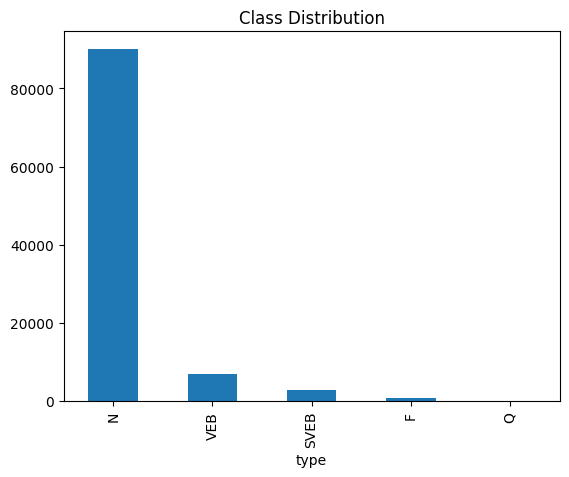

In [37]:
df['type'].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()

# <span style="display: block; text-align: center; color: gold;">Data Prepocessing</span>


In [38]:
# I'm dropping 'record' column since it doesn't add predictive power
df = df.drop(columns=['record'])

# Drop rows where 'type' is 'Q', too few rows...
df = df[df['type'] != 'Q']

label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])


In [39]:
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


{'F': 0, 'N': 1, 'SVEB': 2, 'VEB': 3}


In [40]:
X = df.drop('type', axis=1)
y = df['type']


In [41]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)


# <span style="display: block; text-align: center; color: gold;">Baseline Models</span>


## <span style="display: block; text-align: center; color: aqua;">XGBoost</span>


In [42]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', verbosity=0, random_state=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_val)

print("XGBoost Classification Report:")
print(classification_report(y_val, y_pred_xgb, target_names=label_encoder.classes_))


XGBoost Classification Report:
              precision    recall  f1-score   support

           F       0.93      0.84      0.88       121
           N       0.99      1.00      1.00     13512
        SVEB       0.95      0.89      0.92       417
         VEB       0.98      0.98      0.98      1051

    accuracy                           0.99     15101
   macro avg       0.96      0.93      0.94     15101
weighted avg       0.99      0.99      0.99     15101



## <span style="display: block; text-align: center; color: aqua;">CatBoost</span>


In [43]:
cat_model = CatBoostClassifier(verbose=0, random_state=42)

cat_model.fit(X_train, y_train)

y_pred_cat = cat_model.predict(X_val)

print("CatBoost Classification Report:")
print(classification_report(y_val, y_pred_cat, target_names=label_encoder.classes_))


CatBoost Classification Report:
              precision    recall  f1-score   support

           F       0.94      0.84      0.89       121
           N       0.99      1.00      1.00     13512
        SVEB       0.96      0.87      0.91       417
         VEB       0.97      0.98      0.98      1051

    accuracy                           0.99     15101
   macro avg       0.97      0.92      0.94     15101
weighted avg       0.99      0.99      0.99     15101



## <span style="display: block; text-align: center; color: aqua;">LightGBM</span>


In [44]:
lgbm_model = LGBMClassifier(verbosity=-1, random_state=42)

lgbm_model.fit(X_train, y_train)

y_pred_lgbm = lgbm_model.predict(X_val)

print("LightGBM Classification Report:")
print(classification_report(y_val, y_pred_lgbm, target_names=label_encoder.classes_))


LightGBM Classification Report:
              precision    recall  f1-score   support

           F       0.92      0.80      0.86       121
           N       0.99      1.00      1.00     13512
        SVEB       0.96      0.87      0.91       417
         VEB       0.98      0.98      0.98      1051

    accuracy                           0.99     15101
   macro avg       0.96      0.91      0.94     15101
weighted avg       0.99      0.99      0.99     15101



## <span style="display: block; text-align: center; color: aqua;">Soft Ensemble</span>


In [45]:
ensemble_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('cat', cat_model),
        ('lgbm', lgbm_model)
    ],
    voting='soft'  
)

ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='mlogloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learn...
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            objective='multi:softprob', ...)),
                             ('cat',
                              <catboost.core.CatBoostClassifier object at 0x7894726ced10>),
                             ('lgbm',
                              LGBMClassifier(random_state=42, verbosity=-1))],
                 voting='soft')

Ensemble Model Classification Report:
              precision    recall  f1-score   support

           F       0.93      0.81      0.87       121
           N       0.99      1.00      1.00     13512
        SVEB       0.97      0.87      0.92       417
         VEB       0.98      0.98      0.98      1051

    accuracy                           0.99     15101
   macro avg       0.97      0.92      0.94     15101
weighted avg       0.99      0.99      0.99     15101



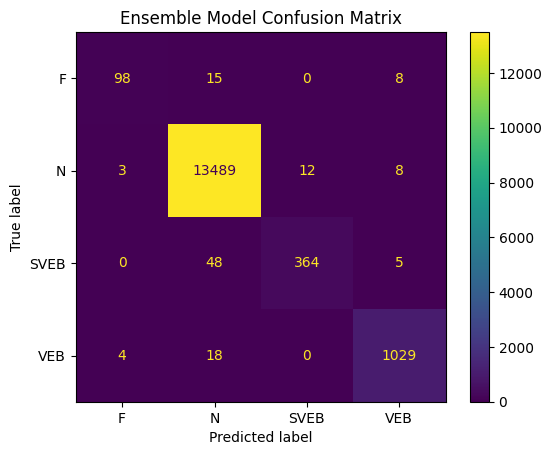

In [46]:
y_pred_ensemble = ensemble_model.predict(X_val)

print("Ensemble Model Classification Report:")
print(classification_report(y_val, y_pred_ensemble, target_names=label_encoder.classes_))

cm = confusion_matrix(y_val, y_pred_ensemble)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()
plt.title("Ensemble Model Confusion Matrix")
plt.show()

Ensemble Model (Test Set) Classification Report:
              precision    recall  f1-score   support

           F       0.98      0.82      0.90       120
           N       0.99      1.00      1.00     13513
        SVEB       0.95      0.86      0.90       417
         VEB       0.98      0.97      0.97      1052

    accuracy                           0.99     15102
   macro avg       0.98      0.91      0.94     15102
weighted avg       0.99      0.99      0.99     15102



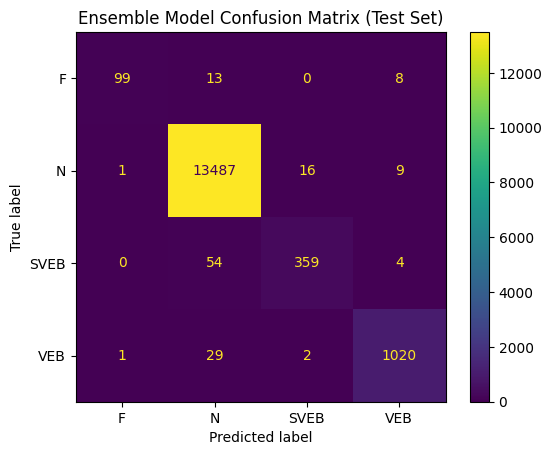

In [47]:
y_pred_ensemble_test = ensemble_model.predict(X_test)

print("Ensemble Model (Test Set) Classification Report:")
print(classification_report(y_test, y_pred_ensemble_test, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_pred_ensemble_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()
plt.title("Ensemble Model Confusion Matrix (Test Set)")
plt.show()


# <span style="display: block; text-align: center; color: gold;">Parameter Search</span>


In [51]:
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 400),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 0.3),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 5)
    }

    model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', **params, random_state=42)
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='f1_macro')
    return scores.mean()

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, n_jobs=-1)

print("Best Hyperparameters for XGBoost (Optuna):")
print(study.best_params)

best_xgb_model = XGBClassifier(
    use_label_encoder=False, 
    eval_metric='mlogloss',
    **study.best_params,
    random_state=42
)
best_xgb_model.fit(X_train, y_train)


[I 2024-12-25 14:48:56,957] A new study created in memory with name: no-name-1e507242-7b32-449e-b14d-4a621008866d
[I 2024-12-25 14:50:24,483] Trial 1 finished with value: 0.9303416131438682 and parameters: {'n_estimators': 202, 'max_depth': 5, 'learning_rate': 0.10401506098203811, 'subsample': 0.9283235838815441, 'colsample_bytree': 0.7601603663075136, 'gamma': 0.043007255557661536, 'min_child_weight': 5}. Best is trial 1 with value: 0.9303416131438682.
[I 2024-12-25 14:50:30,762] Trial 2 finished with value: 0.8778600865173919 and parameters: {'n_estimators': 175, 'max_depth': 6, 'learning_rate': 0.01716779244827391, 'subsample': 0.6057909505342184, 'colsample_bytree': 0.7736892249528393, 'gamma': 0.2955697257380652, 'min_child_weight': 2}. Best is trial 1 with value: 0.9303416131438682.
[I 2024-12-25 14:50:55,399] Trial 0 finished with value: 0.9324974296953907 and parameters: {'n_estimators': 241, 'max_depth': 9, 'learning_rate': 0.17197168888310688, 'subsample': 0.7234416950390123,

Best Hyperparameters for XGBoost (Optuna):
{'n_estimators': 205, 'max_depth': 6, 'learning_rate': 0.19691679712923155, 'subsample': 0.9074890158035341, 'colsample_bytree': 0.7518177618980155, 'gamma': 0.02745984564381758, 'min_child_weight': 4}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7518177618980155, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None,
              gamma=0.02745984564381758, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.19691679712923155,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=4, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=205, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

Optuna-Tuned XGBoost Classification Report:
              precision    recall  f1-score   support

           F       0.96      0.84      0.90       121
           N       0.99      1.00      1.00     13512
        SVEB       0.96      0.89      0.92       417
         VEB       0.98      0.98      0.98      1051

    accuracy                           0.99     15101
   macro avg       0.97      0.93      0.95     15101
weighted avg       0.99      0.99      0.99     15101



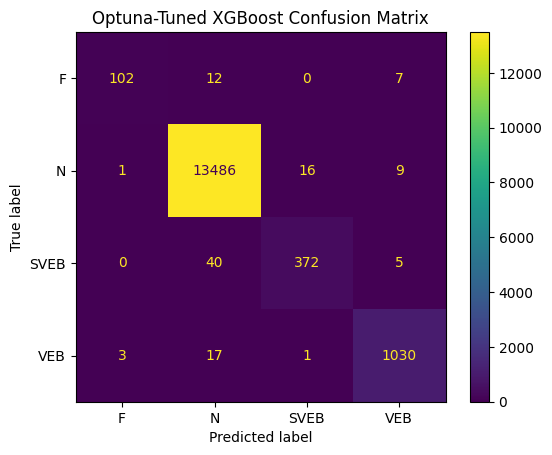

In [52]:
y_pred_xgb_optuna = best_xgb_model.predict(X_val)

print("Optuna-Tuned XGBoost Classification Report:")
print(classification_report(y_val, y_pred_xgb_optuna, target_names=label_encoder.classes_))

cm = confusion_matrix(y_val, y_pred_xgb_optuna)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()
plt.title("Optuna-Tuned XGBoost Confusion Matrix")
plt.show()


Optuna-Tuned XGBoost (Test Set) Classification Report:
              precision    recall  f1-score   support

           F       0.96      0.83      0.89       120
           N       0.99      1.00      1.00     13513
        SVEB       0.95      0.88      0.91       417
         VEB       0.98      0.97      0.97      1052

    accuracy                           0.99     15102
   macro avg       0.97      0.92      0.94     15102
weighted avg       0.99      0.99      0.99     15102



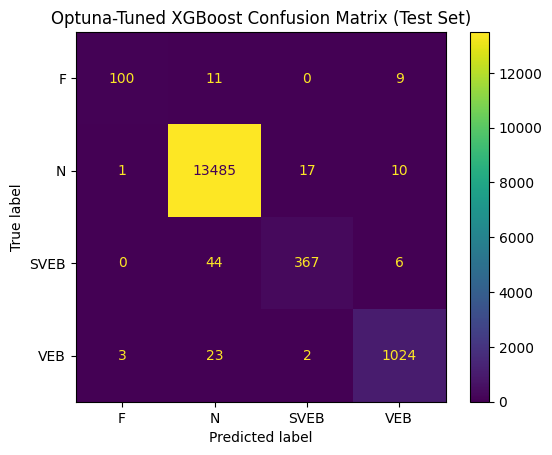

In [53]:
y_pred_xgb_test_optuna = best_xgb_model.predict(X_test)

print("Optuna-Tuned XGBoost (Test Set) Classification Report:")
print(classification_report(y_test, y_pred_xgb_test_optuna, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_pred_xgb_test_optuna)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot()
plt.title("Optuna-Tuned XGBoost Confusion Matrix (Test Set)")
plt.show()


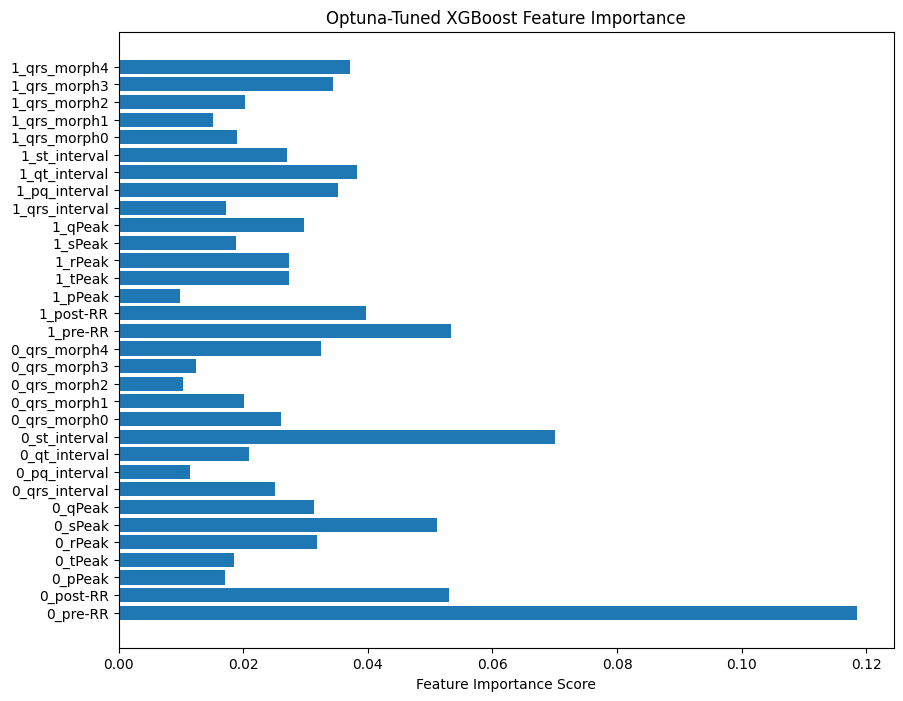

In [54]:
importances = best_xgb_model.feature_importances_
plt.figure(figsize=(10, 8))
plt.barh(X.columns, importances)
plt.title("Optuna-Tuned XGBoost Feature Importance")
plt.xlabel("Feature Importance Score")
plt.show()
